In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [10]:
#initialize environment, load modules/libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
sys.path.append('../')
from geomgen.generators import gen_shapes, gen_noise, gen_image, gen_details
from geomgen.helpers import gen_grid_image

rnd=np.random.default_rng(100)

In [11]:
#Generate a lot of images and save to file

num_shapes=50
max_radius=1/20
min_radius=1/40

num_noise=300
max_line=1/20
min_line=1/80

im_size=160
max_lw=0.15
min_lw=0.1

radius = int(max_radius*im_size)+1
shapes_im_size = 2*radius+1

fluct=0

images = []
labels = []
for i in range(200) :
    shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
    noise = gen_noise(rnd, num_noise, max_line, min_line)
    img, sha, nse = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)
    shapes_img = gen_details(shapes_im_size, sha, img, rnd, fluct)
    labels.extend(sha)
    images.extend(shapes_img)

plt.close()

np.savez_compressed('../data/shapes_tmp.npz', images=images, labels=labels)

In [12]:
#Load images and labels from file 

loaded  = np.load('../data/shapes_tmp.npz')
images = loaded['images']
labels = loaded['labels']

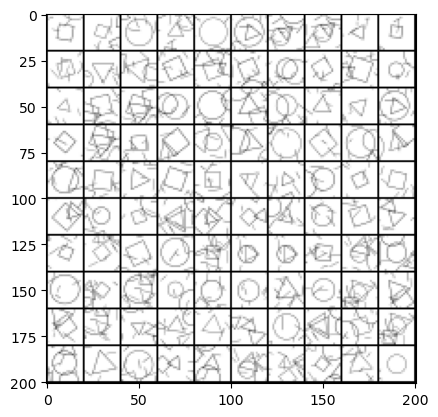

In [13]:
#Show a few images

grid = (10,10)
grid_image, grid_pos = gen_grid_image(images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('../data/tmp_grid.png')
plt.close()

plt.imshow(mpimg.imread('../data/tmp_grid.png'))

In [14]:
#Show sample labels

print("\nposition : shape : [size, rotation, line_width]")
np.set_printoptions(precision=3, suppress=True)
for i in range(20):
    print(f"{grid_pos[i]} : {int(labels[i][0])} {labels[i][3:]}")


position : shape : [size, rotation, line_width]
(0, 0) : 4 [5.634 0.612 0.145]
(0, 1) : 4 [4.33  0.431 0.105]
(0, 2) : 2 [7.338 0.    0.113]
(0, 3) : 3 [4.909 2.002 0.106]
(0, 4) : 2 [7.47  0.    0.101]
(0, 5) : 2 [7.823 0.    0.13 ]
(0, 6) : 3 [4.595 1.173 0.137]
(0, 7) : 2 [4.74  0.    0.105]
(0, 8) : 3 [4.427 1.567 0.133]
(0, 9) : 4 [4.295 0.694 0.147]
(1, 0) : 4 [5.577 1.11  0.112]
(1, 1) : 3 [6.681 1.069 0.117]
(1, 2) : 3 [7.594 1.388 0.111]
(1, 3) : 4 [6.998 1.225 0.146]
(1, 4) : 4 [6.464 1.147 0.121]
(1, 5) : 4 [6.457 1.194 0.143]
(1, 6) : 2 [5.473 0.    0.141]
(1, 7) : 4 [6.035 1.352 0.12 ]
(1, 8) : 4 [7.842 0.446 0.137]
(1, 9) : 2 [4.002 0.    0.128]
